# Trabajo Práctico Final - Minería de Datos Empresariales

## Grupo 4:


Sebastian Garcia Alaniz

Veronica Perozzi

Maria Lucia Lopez Aleman

Juan Carlos Vazquez

Jonathan Pablo Ibañez

---



## **Descripción del Problema**

---
Una entidad financiera quiere obtener un modelo que le permita predecir si una transacción es fraudulenta o no.
El cliente nos ha entregado una base de datos original que contiene 1.362.621 entradas con 12 atributos.
En este conjunto de datos, cada entrada representa una transferencia realizada por una persona.
Cada transacción obtiene una calificación entre fraudulenta o no, según el conjunto de atributos que la definen.

## **Proceso de Análisis**

---



In [4]:
import numpy as np #funcionalidades matematicas
import pandas as pd #dataset management
import matplotlib.pyplot as plt #graficar
import seaborn as sns #visualización
from sklearn import linear_model #análisis predictivo

In [5]:
#Importando el data set 
#from google.colab import drive
#drive.mount('/content/drive')
#Definiendo dataframe
df = pd.read_csv('..//Fraude.csv')
print(df.head(10))

   Unnamed: 0  step      type     amount     nameOrig  oldbalanceOrg  \
0     5003937   353  CASH_OUT  366837.00  C1378361187            0.0   
1     5003938   353  CASH_OUT  227225.22   C211071968            0.0   
2     5003939   353  CASH_OUT   92507.74  C2120887021            0.0   
3     5003940   353  CASH_OUT  162519.57  C1103264078            0.0   
4     5003941   353  CASH_OUT  157257.18  C1401140498            0.0   
5     5003942   353  CASH_OUT  218661.52  C2048984881            0.0   
6     5003943   353  CASH_OUT  151881.86  C1437820890            0.0   
7     5003944   353  CASH_OUT  156376.11   C124349483            0.0   
8     5003945   353  CASH_OUT  108535.35  C1225552625            0.0   
9     5003946   353  CASH_OUT  201536.36  C1004993646            0.0   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             0.0   C971468434       421675.19       558423.14        0   
1             0.0  C1048278624       447213.34       6744

### Descripción de los atributos

step - mapa de unidades de tiempo. Un step es una hora. Total de steps 744 (30 días de simulación)

type - CASH-IN (entrada de dinero, depósito), CASH-OUT (salida de dinero, extracción), DEBIT (Débito), PAYMENT (Pago) and TRANSFER (Transferencia)

amount - monto de la transacción en moneda local

nameOrig - cliente que realizó la transacción

oldbalanceOrg - saldo antes de la transacción

newbalanceOrig - saldo luego de la transacción

nameDest - cliente receptor de la transacción (destinatario/beneficiario)

oldbalanceDest - saldo inicial del destinatario antes de la transacción

newbalanceDest - saldo final del destinatario luego de la transacción

isFraud - marca que determina si la transacción fue fraudulente (1) o no fue fraudulenta (0)

isFlaggedFraud - No usar

In [6]:
# Información del dataset
print(df.keys())

#Dimensionalidad
df.shape

# Visualización de la descripción del DataSet
df.describe(include = 'all')

#Check de datos faltantes
df.isnull().sum()

Index(['Unnamed: 0', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')


Unnamed: 0        0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Tratamiento de variables

In [7]:
#Identificación del tipo de dato de cada variables
df.dtypes

Unnamed: 0          int64
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Vemos que las columnas 1 y 12 (Unnamed: 0) y isFlaggedFraud deberán ser removidas del set de datos. La primera es el número de fila del archivo CSV, por lo que no aporta información importante, mientras que la segunda corresponde, probablemente, a otro método de detección de Fraude pero que no es necesariamente certero.

Además renombraremos las columnas para adecuarlas a nombres de negocio.

In [8]:
# Eliminamos atributos 1, y 12. Trabajando asi con las 10 restantes
df = df.drop(['Unnamed: 0' , 'isFlaggedFraud' ], axis=1)
df= df.rename(columns={'step': 'Tiempo','type': 'Tipo','amount': 'Monto','nameOrig': 'Nombre_origen','oldbalanceOrg': 'Saldo_orig_inicial','newbalanceOrig': 'Saldo_orig_fin','nameDest': 'Nombre_destino','oldbalanceDest': 'saldo_dest_inicial','newbalanceDest': 'saldo_dest_final','isFraud': 'Fraude'})

In [9]:
# Vemos que haya funcionado el renombrado de las columnas
df.head()


,Tiempo,Tipo,Monto,Nombre_origen,Saldo_orig_inicial,Saldo_orig_fin,Nombre_destino,saldo_dest_inicial,saldo_dest_final,Fraude
0,353,CASH_OUT,366837.00,C1378361187,0.0,0.0,C971468434,421675.19,558423.14,0
1,353,CASH_OUT,227225.22,C211071968,0.0,0.0,C1048278624,447213.34,674438.56,0
2,353,CASH_OUT,92507.74,C2120887021,0.0,0.0,C672681554,214510.10,307017.84,0
3,353,CASH_OUT,162519.57,C1103264078,0.0,0.0,C532824402,844653.01,1007172.59,0
4,353,CASH_OUT,157257.18,C1401140498,0.0,0.0,C700036764,2326697.36,2483954.55,0


In [10]:
df[df["Fraude"]==1].head()

,Tiempo,Tipo,Monto,Nombre_origen,Saldo_orig_inicial,Saldo_orig_fin,Nombre_destino,saldo_dest_inicial,saldo_dest_final,Fraude
1354408,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1354409,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
1354410,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
1354411,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
1354412,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


La variable _tipo_ es una variable de tipo categórico, pero la llevaremos a un formato numérico para que los distintos algoritmos puedan trabajar con ella. En este sentido, hay dos caminos posibles, podríamos hacer un LabelEncoding (transformar a números crecientes) o hacer una matriz binaria por características. En este caso, optamos por realizar el Label Encoding.
De todas formas, dejamos "comentada" la celda para hacer el pandas get dummies, en caso de que fuera interesante testearlo.

In [11]:
#Discretizamos la variable. Reemplazando categorías, por valores númericos, para luego convertir a formato int la variable

# Relevamos las categorias de la variable "Tipo"
print(df['Tipo'].unique())
df = df.replace(to_replace = ["CASH_OUT", "PAYMENT", "CASH_IN", "TRANSFER", "DEBIT"],
                 value = ["1", "2", "3", "4", "5",])

df['Tipo'] = df['Tipo'].astype(int)   #Discretización

['CASH_OUT' 'PAYMENT' 'CASH_IN' 'TRANSFER' 'DEBIT']


In [12]:
# Si resulta interesante testear con get dummies, descomentar esta celda y comentar la de arriba.

#tipo = pd.get_dummies(df["Tipo"])
#df.drop(columns='Tipo',inplace=True)
#df = pd.concat([df,tipo],axis=1)

Por otro lado, inicialmente, las variables categóricas Nombre_origen y Nombre_destino corresponden a las cuentas de origen y destino. Si bien podrían resultar información interesante, en un primer análisis, optaremos por removerlas, ya que su cardinalidad es muy alta.

<AxesSubplot:>

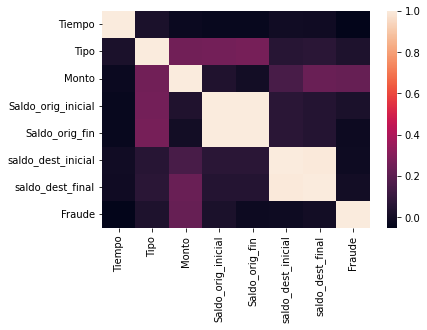

In [13]:
#Removemos variables categoricas, y corremos matriz de correlación
df1= df.drop([ 'Nombre_origen','Nombre_destino'  ], axis=1)

# Dibujamos un diagrama de correlación para entender las relaciones entre las variables.
sns.heatmap(df1.corr())

En principio, en el mapa de correlación, podemos ver que Fraude parece tener una correlación media con el monto, y ligera correlación con el tipo y con el saldo de origen inicial. A su vez, vemos una alta correlación entre saldo de origen inicial y final, y lo mismo en el saldo de destino, cosa que tiene sentido desde el punto de vista de negocio.

Procederemos a escalar las variables, para llevarlas a un mismo nivel de magnitud, para lo cual utilizaremos Standard Scaler

In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() # Instanciamos Standard Scaler
# Escalo las variables
df1_scaled = scalar.fit_transform(df1.drop(columns="Fraude")) #Escalamos todo menos fraude
df1_scaled = pd.DataFrame(df1_scaled,columns=df1.drop(columns="Fraude").columns) # volvemos a convertir la matriz en dataframe

Antes del siguiente paso, y ahora que ya tenemos los datos tratados y normalizados, procederemos a dividir el set de datos en train y test, para dejar un conjunto de datos sin tocar para luego evaluar los modelos.

In [15]:
#Split train vs. test
from sklearn.model_selection import train_test_split
X = df1_scaled # nos quedamos con todos los registros y columnas, salvo la ultima columna q es Fraude
y = df1["Fraude"] # nos quedamos con todos los registros de la última columna
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
print(x_train.shape)
print(y_test.shape)

(953834, 7)
(408787,)


### Desbalance de Categorías

El siguiente paso será evaluar que tan desbalanceado está el set de datos, en relación a la característica objetivo (Fraude) y luego balancearlo de forma más adecuada.

0    948142
1      5692
Name: Fraude, dtype: int64

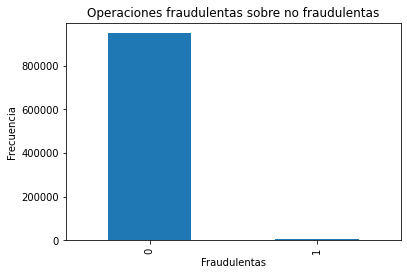

In [16]:
# Dataset - Evaluamos que tan desbalanceado esta
contar_clases_fraude = pd.value_counts(y_train, sort = False)

# Utilizamos el método gráfico de las barras, que es válido para clasificar cuando hay pocas categorias 

contar_clases_fraude.plot (kind='bar')
plt.title("Operaciones fraudulentas sobre no fraudulentas")
plt.xlabel("Fraudulentas")
plt.ylabel("Frecuencia")

contar_clases_fraude.head()

Vemos que el set de datos está bastante desbalanceado (cómo era de esperar) con un muy bajo número de datos correspondiente a Fraude. Para poder intentar un modelado más representativo, lo que haremos será tomar la misma cantidad de casos de No Fraude que de casos de Fraude, es decir, haremos un downsampling. Esto lo haremos sólo en el set de datos de train, para dejar el de test con la proporción normal.

In [17]:
from sklearn.utils import resample, shuffle

# combino x_train e y_train para hacer más fácil el resampling
x_train["Fraude"]=y_train

# Separo en clase mayoritaria y minoritaria
df_majority = x_train[x_train["Fraude"]==0]
df_minority = x_train[x_train["Fraude"]==1]
 
# Hago el downsampling de la clase mayoritaria
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sin reemplazo
                                 n_samples=len(df_minority),     # a la misma cantidad que la clase minoritaria
                                 random_state=123) # para reproducibilidad
 
# Combinamos la clase mayoritaria "rebajada" con la minoritaria
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = shuffle(df_downsampled)
# Vemos el nuevo balance
df_downsampled.Fraude.value_counts()

AttributeError: 'DataFrame' object has no attribute 'shuffle'

In [ ]:
# Volvemos a armar x_train e y_train, ahora que ya están balanceados.
x_train = df_downsampled.drop(columns="Fraude")
y_train = df_downsampled["Fraude"]

In [ ]:
x_train.columns

Index(['Tiempo', 'Tipo', 'Monto', 'Saldo_orig_inicial', 'Saldo_orig_fin',
       'saldo_dest_inicial', 'saldo_dest_final'],
      dtype='object')

In [ ]:
x_train.dtypes

Tiempo                float64
Tipo                  float64
Monto                 float64
Saldo_orig_inicial    float64
Saldo_orig_fin        float64
saldo_dest_inicial    float64
saldo_dest_final      float64
dtype: object

### Modelado
Para realizar el modelado, utilizaremos tres modelos diferentes, en orden creciente de complejidad. El problema es adecuado a un modelo de clasificación, por lo que utilizaremos un modelo de regresión logística, luego un random forest y para terminar una red neuronal, con el fin de poder comparar distintos modelos en cuanto a su performance.

***MODELO DE REGRESION LOGISTICA***

In [ ]:
# Defino el algoritmo
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# Entreno el modelo
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Realizamos una prediccion con el conjunto de test
y_pred = lr.predict(x_test)

In [ ]:
# Para conocer la eficiencia del modelo, creamos la matriz de confusión y también utilizamos el reporte de clasificación
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
matriz = confusion_matrix(y_test, y_pred)
matriz

array([[398826,   7467],
       [   462,   2032]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    406293
           1       0.21      0.81      0.34      2494

    accuracy                           0.98    408787
   macro avg       0.61      0.90      0.66    408787
weighted avg       0.99      0.98      0.99    408787



**MODELO RANDOM FOREST y GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rf_preds = rf.predict(x_test)
gb_preds = gb.predict(x_test)

In [ ]:
print("Random Forest")
print(confusion_matrix(y_test, rf_preds))
print("Gradient Boosting")
print(confusion_matrix(y_test, gb_preds))

Random Forest
[[402997   3296]
 [     8   2486]]
Gradient Boosting
[[401787   4506]
 [     6   2488]]


In [ ]:
print("Random Forest")
print(classification_report(y_test, rf_preds))
print("Gradient Boosting")
print(classification_report(y_test, gb_preds))

Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    406293
           1       0.43      1.00      0.60      2494

    accuracy                           0.99    408787
   macro avg       0.71      0.99      0.80    408787
weighted avg       1.00      0.99      0.99    408787

Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    406293
           1       0.36      1.00      0.52      2494

    accuracy                           0.99    408787
   macro avg       0.68      0.99      0.76    408787
weighted avg       1.00      0.99      0.99    408787



**MODELO RED NEURONAL**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

"""Parámetros
activación : ‘relu’
Función de activación para la capa oculta. ‘relu’, la función la función de unidad lineal rectificada, devuelve f(x) = max(0, x)
hidden_layer_sizes : cantidad de neuronas por capa = n_layers - 2, default (100,)
learning_rate : default ‘constant’
learning_rate_init : default 0.001
max_iter : int, default 200
"""

In [ ]:
mlp.fit(x_train,y_train)

/home/charly/_venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

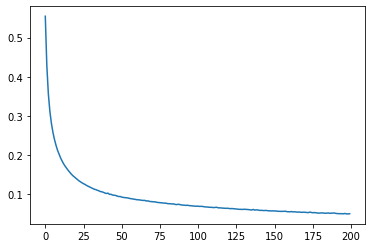

In [ ]:
# Grafico la curva de perdida
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.show()

In [ ]:
#Testeo
pred = mlp.predict(x_test)
pred

array([1, 0, 0, ..., 0, 0, 0])


"""Métricas del modelo"""

In [ ]:
#Matriz de confusión
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred)

array([[396140,  10153],
       [    37,   2457]])

In [ ]:
#funcion f2 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    406293
           1       0.19      0.99      0.33      2494

    accuracy                           0.98    408787
   macro avg       0.60      0.98      0.66    408787
weighted avg       0.99      0.98      0.98    408787



Luego de analizar todos los modelos, podemos ver que el mejor es el de Random Forest (de hecho, los otros son bastante malos). Los modelos de fraude suelen ser bastante complejos debido a que son muy pocos casos los que tienen para aprender.

Ahora procederemos a hacer un Grid Search para optimizar los parámetros del Random Forest.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = RandomForestClassifier()
params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
grid = RandomizedSearchCV(rf,params)
grid.fit(x_train, y_train)

/home/charly/_venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/charly/_venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/charly/_venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

/home/charly/_venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/charly/_venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/charly/_venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [ ]:
grid.best_estimator_.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [ ]:
grid.best_estimator_.score(x_test,y_test)

0.9924850839190091

In [ ]:
grid_preds = grid.best_estimator_.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,grid_preds))

[[403224   3069]
 [     3   2491]]


In [ ]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    406293
           1       0.45      1.00      0.62      2494

    accuracy                           0.99    408787
   macro avg       0.72      1.00      0.81    408787
weighted avg       1.00      0.99      0.99    408787



Podemos ver que, luego de probar con distintos parámetros, hubo una mejora, aunque es muy ligera (0.01).

## Conclusión

En base a lo analizado, el mejor modelo a utilizar es el random forest, con los hiperparámetros mencionados anteriormente. Cabe destacar que los modelos de fraude siempre son complejos, y que el resultado probablemente pueda ser mejorable si podemos agregar más variables, por ejemplo relacionadas a las transacciones, a las cuentas u otras. 
De todas formas, el 0.62 obtenido para la predicción de fraude, sumado a un recall de 1.00 (que indica que agarramos TODAS las transacciones fraudulentas), puede ser un buen modelo base para comenzar a poner productivo y testear en el mundo real.

In [ ]:
# Picklear ese modelo
import pickle
with open('modelo_fraude.pickle', 'wb') as handle:
    pickle.dump(grid.best_estimator_,handle)